# Exploratory data analysis (EDA) on Kaggle "House Prices - Advanced Regression Techniques" Dataset

## What is the business problem?

### Who might benefit from this project?  How? 
- Housing companies like Zillow or Redfin, maybe banks, could also help buyers and sellers to know how to predict house values

### What is the goal?
- Train a model on house values given certain inputs
1. Analyze house dataset for actionable insights
2. Create model with .138 or lower RMSLE

## Library imports

In [15]:
import pandas as pd
pd.set_option("display.max_columns", 100)

import numpy as np
np.set_printoptions(legacy="1.25")

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_log_error
from sklearn.model_selection import train_test_split

## Load dataset

In [16]:
train_file_path = "../../house-prices-advanced-regression-techniques/input/train.csv"
houses = pd.read_csv(train_file_path)
print("Full training dataset shape is {}".format(houses.shape))

Full training dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can look at all 81 dimensions of our dataset by printing out the first 5 entries and changing our max column display:

In [17]:
pd.set_option("display.max_columns", 85)  # Shows up to 85 columns
houses.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [18]:
houses["Id"].nunique() == houses.shape[0]
# True so Id column is unique per row

True

In [19]:
houses = houses.drop(
    "Id", axis=1)  # drop "Id" column as it's not necessary for model training
houses.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [20]:
houses.drop_duplicates(inplace=True)  # drop any duplicates
print("Modified training dataset shape is {}".format(houses.shape))

Modified training dataset shape is (1460, 80)


In [21]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## What are we looking at?

### What is the source of the data?
- Kaggle competition dataset

### What does it describe? (What is a row?)
- All the characteristics of a house. A row is the data from a house.

### What is the shape of the data?
- The shape of the DataFrame is 1460 observations (rows), 80 features (columns)
- There are 37 numeric and 43 object features
- There are 79 features for use in predicting the house sale price indicated by target column `SalePrice`

## House Price Distribution

Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


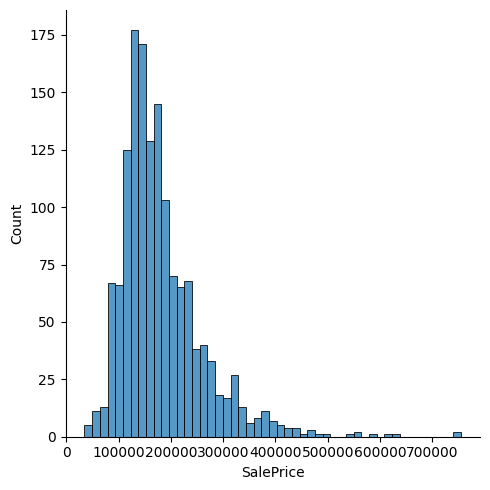

In [22]:
print(houses["SalePrice"].describe())
sns.displot(houses["SalePrice"], kind="hist")
plt.tight_layout();

Slightly skewed right but generally a normal distribution. Taking the natural logarithm of these values will help scale down outliers and make distribution appear more normal.

## Numerical data distribution

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones. Then we will strip/impute to create a baseline model to get a baseline RMSLE (evaluation criteria for this competition)

In [23]:
houses.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

In [24]:
df_num = houses.select_dtypes(include=["float64", "int64"])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


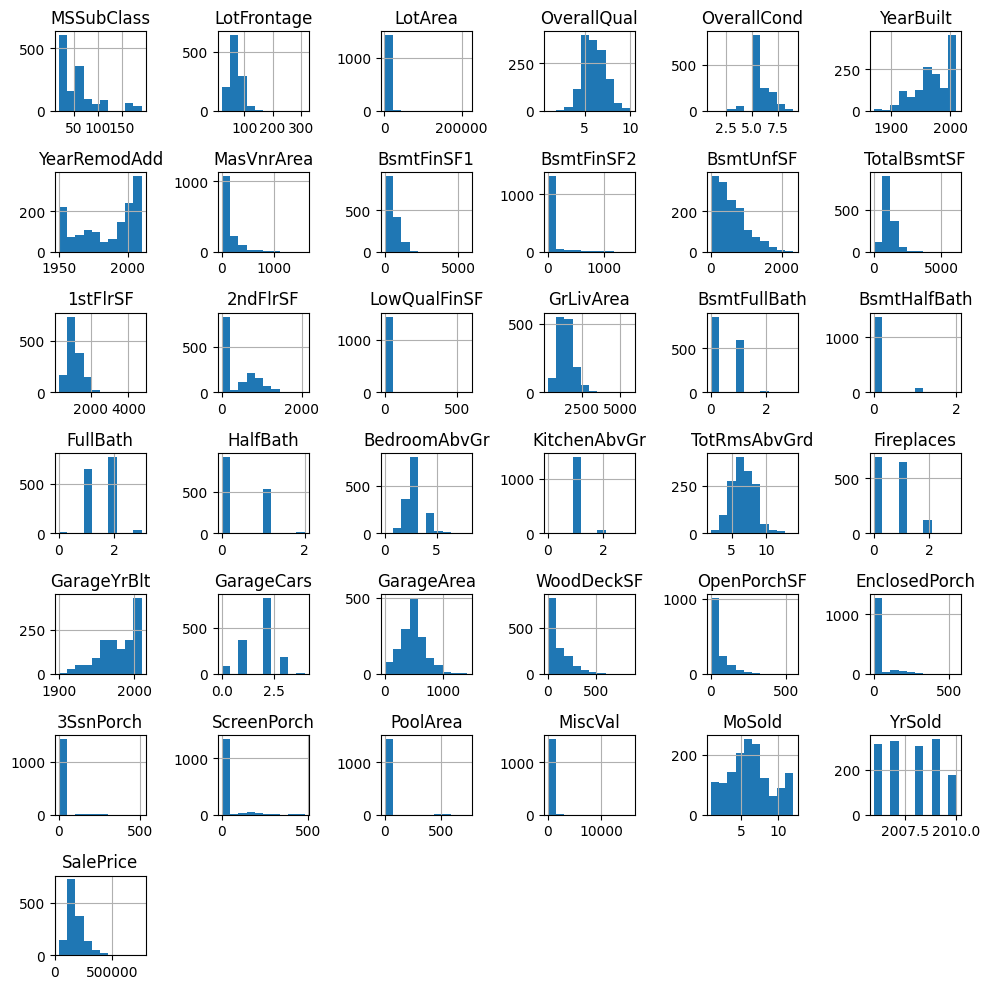

In [25]:
df_num.hist(figsize=(10, 10))
plt.tight_layout();

<Axes: >

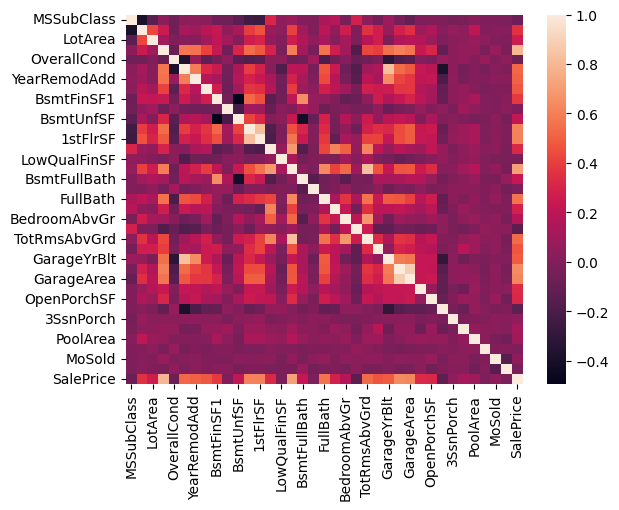

In [29]:
sns.heatmap(df_num.corr())

# Continuing EDA

## Columns
### Index
- Id

### Object Columns
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- ExterQual
- ExterCond
- Foundation
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Heating
- HeatingQC
- CentralAir
- Electrical
- KitchenQual
- Functional
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- Fence
- MiscFeature
- SaleType
- SaleCondition

### Numeric Columns
- MSSubClass
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold

### Target
- SalePrice


In [14]:
# some basic methods to understand the DataFrame
houses.info()
display(f"The shape of the DataFrame is {houses.shape}")
display(f"The number of duplicated rows is {houses.duplicated().sum()}")
houses.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

'The shape of the DataFrame is (1460, 80)'

'The number of duplicated rows is 0'

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
(houses.isna().sum().sort_values(ascending=False).head(20) / houses.shape[0]).round(4) * 100
# 19 columns with null values upon initial inspection
# displayed as percent of missing numbers in data per column

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
MSSubClass       0.00
dtype: float64

From data_description we know `PoolQC` and `Alley` NaN mean there is no pool/alley. Let's impute 0 for NaN later. Let's drop MiscFeature since the price of misc features in included in MiscVal and that will help our model more than so many NaNs. Now let's examine `Fence`, `MasVnrType`, and `FireplaceQu` with an intention to drop or impute for other null columns later.

In [16]:
houses[["Fence", "MasVnrType", "FireplaceQu"]]

,Fence,MasVnrType,FireplaceQu
0,NaN,BrkFace,NaN
1,NaN,NaN,TA
2,NaN,BrkFace,TA
3,NaN,NaN,Gd
4,NaN,BrkFace,TA
...,...,...,...
1455,NaN,NaN,TA
1456,MnPrv,Stone,TA
1457,GdPrv,NaN,Gd
1458,NaN,NaN,NaN


In [49]:
display(houses["Fence"].value_counts())
# good to nominally encode and impute 0 for nulls
display(houses["MasVnrType"].value_counts())
# good to nominally encode and impute 0 for nulls
display(houses["FireplaceQu"].value_counts())
# using data_description, need to ordinally encode
# will impute 0 for nulls and rank 5 to 1 from Ex to Po

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [50]:
# looking back at other NaN columns
(houses.isna().sum().sort_values(ascending=False).head(20) / houses.shape[0]).round(4) * 100

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
Id               0.00
dtype: float64

After consulting data_description, will impute 0 for other columns with NaNs

After referencing data_description for feature values as well as above exploration to which are numeric and object, the encoding plan is as follows:

## Features to Drop
- MSSubClass: Identifies the type of dwelling involved in the sale.	(confounds data from YearBuilt, HouseStyle, and BldgType)
- MiscFeature: Miscellaneous feature not covered in other categories (too many null values and MiscVal offers some insight into this column, but numerically)

## Features for Ordinal Encoding
- Fence: Fence quality (GdPrv	Good Privacy MnPrv	Minimum Privacy GdWo	Good Wood MnWw	Minimum Wood/Wire NA	No Fence)
- PavedDrive: Paved driveway (Y	Paved P	Partial Pavement N	Dirt/Gravel)
- Functional: Home functionality (Assume typical unless deductions are warranted) (Typ	Typical Functionality Min1	Minor Deductions 1 Min2	Minor Deductions 2 Mod	- Moderate Deduction Maj1	Major Deductions 1 Maj2	Major Deductions 2 Sev	Severely Damaged Sal	Salvage only)
- Electrical: Electrical system (2 SBrkr	Standard Circuit Breakers & Romex 1 FuseA	Fuse Box over 60 AMP and all Romex wiring (Average) 0 Mix	Mixed -1 FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)  -2 FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor))
- BsmtExposure: Refers to walkout or garden level walls (Gd	Good Exposure Av	Average Exposure (split levels or foyers typically score average or above)	 Mn	Mimimum Exposure No	No Exposure NA	No Basement)

## Features for Ordinal Encoding with the same ranking __{"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, NaN: 0}__

1. HeatingQC: Heating quality and condition 
2. KitchenQual: Kitchen quality 
3. GarageCond: Garage condition 
4. GarageQual: Garage quality 
5. FireplaceQu: Fireplace quality 
6. BsmtQual: Evaluates the height of the basement
7. BsmtCond: Evaluates the general condition of the basement
8. ExterCond: Evaluates the present condition of the material on the exterior
9. ExterQual: Evaluates the quality of the material on the exterior 
10. PoolQC: Pool quality 

## Nominal Features to encode

### One Hot Encoder (besides MoSold, these features have less than 5 categories)
- MoSold: Month Sold (MM)
- GarageFinish: Interior finish of the garage
- CentralAir: Central air conditioning binary
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property

### Hashing Encoder (5 or more categories)
- SaleCondition: Condition of sale
- SaleType: Type of sale
- GarageType: Garage location
- Heating: Type of heating
- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- Neighborhood: Physical locations within Ames city limits			
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- RoofStyle: Type of roof	
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house	
- Exterior2nd: Exterior covering on house (if more than one material)	
- MasVnrType: Masonry veneer type
- Foundation: Type of foundation
- BsmtFinType1: Rating of basement finished area 
- BsmtFinType2: Rating of basement finished area (if multiple types)

## Numeric Columns
- MiscVal: $Value of miscellaneous feature
- YrSold: Year Sold (YYYY)
- PoolArea: Pool area in square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageYrBlt: Year garage was built
- Fireplaces: Number of fireplaces
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
- KitchenAbvGr: Kitchens above grade
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- MasVnrArea: Masonry veneer area in square feet
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house

#### Will sum all porches into one Porch column and then encode numerically

- ScreenPorch: Screen porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet

## Target
- SalePrice

# Build preliminary model with numerical data for baseline submission

In [19]:
df_num.dropna(inplace=True)  # drop any NaNs
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1121 non-null   int64  
 1   LotFrontage    1121 non-null   float64
 2   LotArea        1121 non-null   int64  
 3   OverallQual    1121 non-null   int64  
 4   OverallCond    1121 non-null   int64  
 5   YearBuilt      1121 non-null   int64  
 6   YearRemodAdd   1121 non-null   int64  
 7   MasVnrArea     1121 non-null   float64
 8   BsmtFinSF1     1121 non-null   int64  
 9   BsmtFinSF2     1121 non-null   int64  
 10  BsmtUnfSF      1121 non-null   int64  
 11  TotalBsmtSF    1121 non-null   int64  
 12  1stFlrSF       1121 non-null   int64  
 13  2ndFlrSF       1121 non-null   int64  
 14  LowQualFinSF   1121 non-null   int64  
 15  GrLivArea      1121 non-null   int64  
 16  BsmtFullBath   1121 non-null   int64  
 17  BsmtHalfBath   1121 non-null   int64  
 18  FullBath     

# Baseline Submission
Submitting predictions on the competition test data using the baseline model.

Since we have a fully numeric dataset with no missing values, let's build a quick model and see how it does

In [ ]:
X_num = df_num.drop(columns="SalePrice")
y_num = df_num["SalePrice"].copy()

In [ ]:
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(
    X_num, y_num, test_size=0.2, random_state=42
)

In [22]:
rf_num = RandomForestRegressor(random_state=42)
rf_num.fit(X_num_train, y_num_train)

RandomForestRegressor(random_state=42)

In [ ]:
num_train_pred = rf_num.predict(X_num_train)
rf_num_RMSLE_train = root_mean_squared_log_error(
    y_num_train, num_train_pred
)  # checking root_mean_squared_log_error which is the criterion for this Kaggle competition
rf_num_RMSLE_train

0.06580671711184483

In [ ]:
num_test_pred = rf_num.predict(X_num_test)
rf_num_RMSLE_test = root_mean_squared_log_error(y_num_test, num_test_pred)
rf_num_RMSLE_test

0.13116492334564084

In [ ]:
test_file_path = "../../house-prices-advanced-regression-techniques/input/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop("Id")

preds = rf_num.predict(test_data[X_num.columns])
output = pd.DataFrame({"Id": ids, "SalePrice": preds})

output.head()

,Id,SalePrice
0,1461,123095.66
1,1462,155594.00
2,1463,187684.40
3,1464,185909.33
4,1465,212736.98


In [ ]:
sample_submission_file_path = (
    "../../house-prices-advanced-regression-techniques/input/sample_submission.csv"
)
sample_submission_df = pd.read_csv(sample_submission_file_path)
sample_submission_df["SalePrice"] = preds
sample_submission_df.to_csv("00_baseline_submission.csv", index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,123095.66
1,1462,155594.00
2,1463,187684.40
3,1464,185909.33
4,1465,212736.98
